# Install and Import Libraries

In [4]:
!pip install whit-phys-util

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import whit_phys_util as buc

# Connect to GitHub repository

In [6]:
repo = buc.local_repository("https://github.com/WhitworthPhysics/colab-intro-lesson-4-CalvinMPayne")

Repository exists at this location. Pulling changes from GitHub.


In [11]:
repo.pull(verbose=True)

Updating b77462d..a6d7e82
Fast-forward
 current-vs-voltage-data.csv | 6 ++++++
 1 file changed, 6 insertions(+)
 create mode 100644 current-vs-voltage-data.csv
git pull
From https://github.com/WhitworthPhysics/colab-intro-lesson-4-CalvinMPayne
   b77462d..a6d7e82  main       -> origin/main


# Import Data

In [13]:
df = pd.read_csv('current-vs-voltage-data.csv')
df

,Voltage (V),Current (mA),Current Uncertainty (mA)
0,1.0,5.3,1.3
1,2.0,9.8,1.5
2,3.0,14.7,1.4
3,4.0,25.2,3.2
4,5.0,23.6,1.7


# Data Analysis

In [21]:
fitTable_with_unc, fitFunc_with_unc = buc.prettyPolyFit(df['Voltage (V)'],df['Current (mA)'],yerr=df['Current Uncertainty (mA)'])
fitTable_with_unc

,slope,intercept
value,4.811047,0.466645
uncertainty,0.527921,1.550880


In [20]:
fitTable_wo_unc, fitFunc_wo_unc = buc.prettyPolyFit(df['Voltage (V)'], df['Current (mA)'])
fitTable_wo_unc

,slope,intercept
value,5.200000,0.120000
uncertainty,1.870045,6.202236


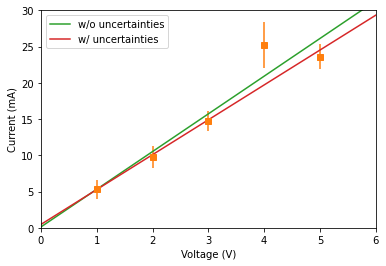

In [22]:
fig, ax = plt.subplots()
ax.plot(df['Voltage (V)'],df['Current (mA)'],"*")
ax.set_xlabel("Voltage (V)");
ax.set_ylabel("Current (mA)");
ax.set_xlim(0,6);
ax.set_ylim(0,30);
ax.errorbar(df['Voltage (V)'], df['Current (mA)'], yerr=df['Current Uncertainty (mA)'], fmt='s');
V_fit = np.linspace(0,6,2);
ax.plot(V_fit, fitFunc_wo_unc(V_fit), label="w/o uncertainties")
ax.plot(V_fit, fitFunc_with_unc(V_fit), label="w/ uncertainties")
ax.legend();